# LGM VIRTUAL INTERNSHIP PROGRAM 2021

## Exploratory Data Analysis on Dataset - Terrorism 

# Importing the Libraries

In [2]:
import pandas as pd
import numpy as np # linear algebra
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import numpy as np
import seaborn as sns

# Importing the Dataset

In [3]:
df = pd.read_csv(r'C:/Users/Harshit Tyagi/Downloads/Global Terrorism - START data/globalterrorismdb_0718dist.csv')

C:\Users\Harshit Tyagi\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
df.head(5)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [5]:
df.rename(columns={'iyear':'Year','imonth':'Month','city':'City','iday':'Day','country_txt':'Country','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)
df['Casualities'] = df.Killed + df.Wounded
df=df[['Year','Month','Day','Country','Region','City','latitude','longitude','AttackType','Killed','Wounded','Casualities','Target','Group','Target_type','Weapon_type']]

df.head()

,Year,Month,Day,Country,Region,City,latitude,longitude,AttackType,Killed,Wounded,Casualities,Target,Group,Target_type,Weapon_type
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,1.0,Julio Guzman,MANO-D,Private Citizens & Property,Unknown
1,1970,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,0.0,"Nadine Chaval, daughter",23rd of September Communist League,Government (Diplomatic),Unknown
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,1.0,Employee,Unknown,Journalists & Media,Unknown
3,1970,1,0,Greece,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,NaN,U.S. Embassy,Unknown,Government (Diplomatic),Explosives
4,1970,1,0,Japan,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,NaN,U.S. Consulate,Unknown,Government (Diplomatic),Incendiary


In [6]:
df.isnull().sum()

Year               0
Month              0
Day                0
Country            0
Region             0
City             434
latitude        4556
longitude       4557
AttackType         0
Killed         10313
Wounded        16311
Casualities    16874
Target           636
Group              0
Target_type        0
Weapon_type        0
dtype: int64

# Data Visulization

### Yearly Plot

C:\Users\Harshit Tyagi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


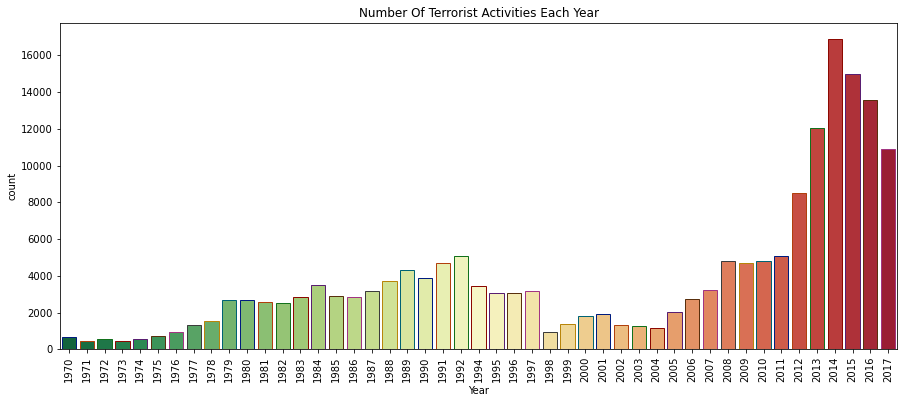

In [7]:
plt.subplots(figsize=(15,6))
sns.countplot('Year',data=df,palette='RdYlGn_r',edgecolor=sns.color_palette('dark',10))
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities Each Year')
plt.show()

### Yearly Casualities

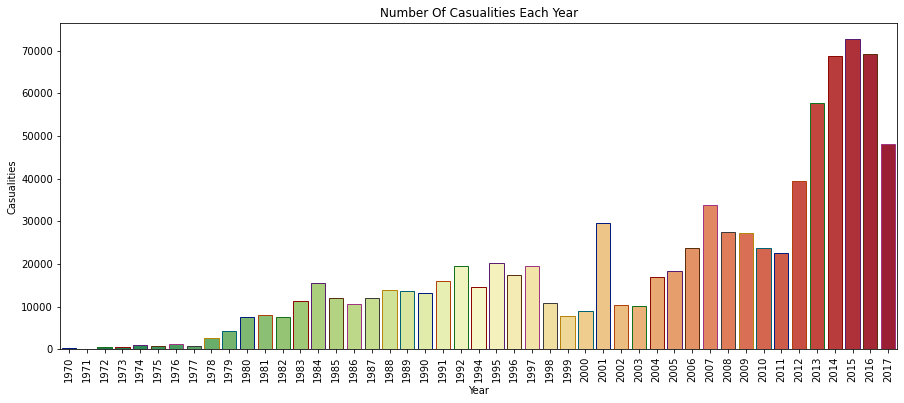

In [8]:
plt.subplots(figsize=(15,6))
year_cas = df.groupby('Year').Casualities.sum().to_frame().reset_index()
year_cas.columns = ['Year','Casualities']
sns.barplot(x=year_cas.Year, y=year_cas.Casualities, palette='RdYlGn_r',edgecolor=sns.color_palette('dark',10))
plt.xticks(rotation=90)
plt.title('Number Of Casualities Each Year')
plt.show()

### Number of Total Attacks in Each Country

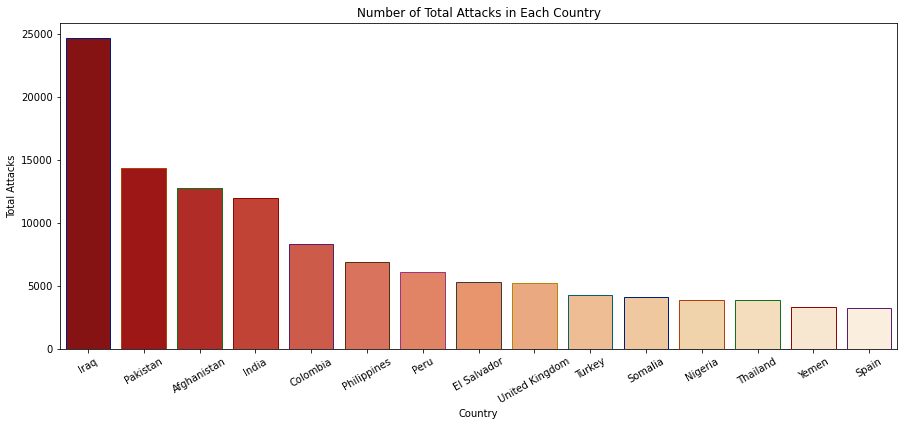

In [9]:
plt.subplots(figsize=(15,6))
country_attacks = df.Country.value_counts()[:15].reset_index()
country_attacks.columns = ['Country', 'Total Attacks']
sns.barplot(x=country_attacks.Country, y=country_attacks['Total Attacks'], palette= 'OrRd_r',edgecolor=sns.color_palette('dark',10))
plt.xticks(rotation=30)
plt.title('Number of Total Attacks in Each Country')
plt.show()

### Number of Total Casualities in Each Country

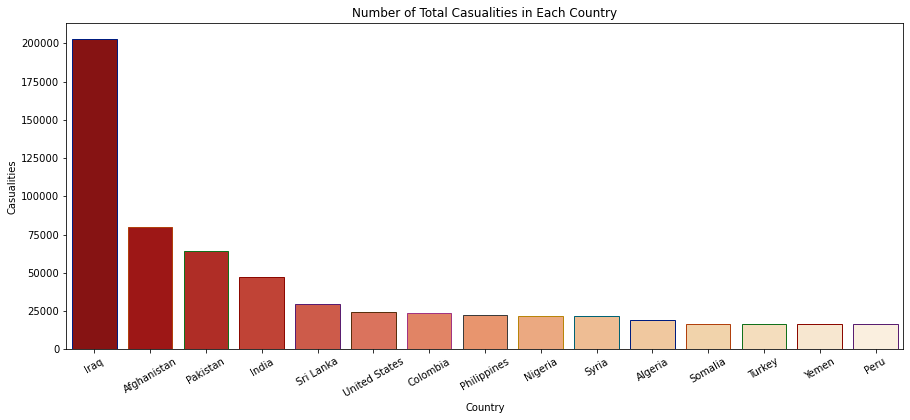

In [10]:
plt.subplots(figsize=(15,6))
count_cas = df.groupby('Country').Casualities.sum().to_frame().reset_index().sort_values('Casualities', ascending=False)[:15]
sns.barplot(x=count_cas.Country, y=count_cas.Casualities, palette= 'OrRd_r',edgecolor=sns.color_palette('dark',10))
plt.xticks(rotation=30)
plt.title('Number of Total Casualities in Each Country')
plt.show()

### Number of Total Attacks in Each Region

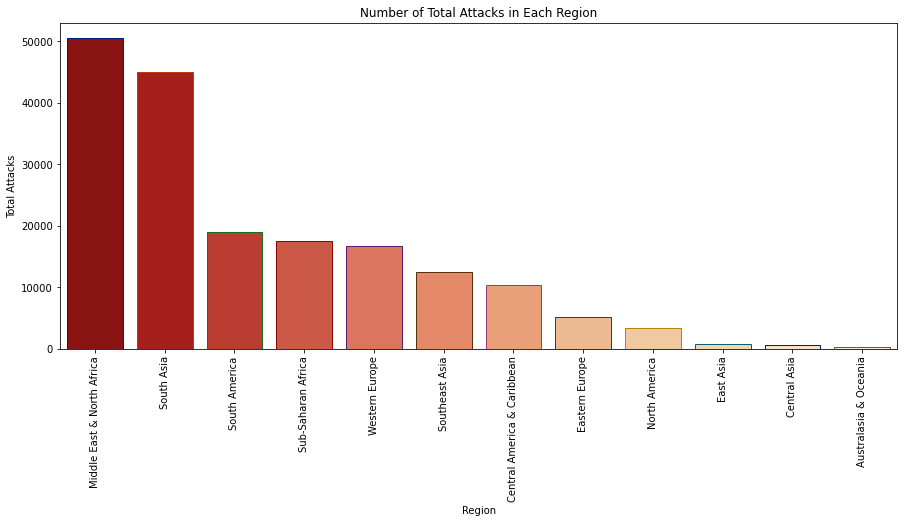

In [11]:
region_attacks = df.Region.value_counts().to_frame().reset_index()
region_attacks.columns = ['Region', 'Total Attacks']
plt.subplots(figsize=(15,6))
sns.barplot(x=region_attacks.Region, y=region_attacks['Total Attacks'], palette='OrRd_r', edgecolor=sns.color_palette('dark',10))
plt.xticks(rotation=90)
plt.title('Number of Total Attacks in Each Region')
plt.show()

# Lets have a look at terrorism in most affected countries


## India

In [12]:
India=df[df['Country']=='India']

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41]),
 [Text(0, 0, '1972'),
  Text(1, 0, '1975'),
  Text(2, 0, '1976'),
  Text(3, 0, '1977'),
  Text(4, 0, '1979'),
  Text(5, 0, '1980'),
  Text(6, 0, '1981'),
  Text(7, 0, '1982'),
  Text(8, 0, '1983'),
  Text(9, 0, '1984'),
  Text(10, 0, '1985'),
  Text(11, 0, '1986'),
  Text(12, 0, '1987'),
  Text(13, 0, '1988'),
  Text(14, 0, '1989'),
  Text(15, 0, '1990'),
  Text(16, 0, '1991'),
  Text(17, 0, '1992'),
  Text(18, 0, '1994'),
  Text(19, 0, '1995'),
  Text(20, 0, '1996'),
  Text(21, 0, '1997'),
  Text(22, 0, '1998'),
  Text(23, 0, '1999'),
  Text(24, 0, '2000'),
  Text(25, 0, '2001'),
  Text(26, 0, '2002'),
  Text(27, 0, '2003'),
  Text(28, 0, '2004'),
  Text(29, 0, '2005'),
  Text(30, 0, '2006'),
  Text(31, 0, '2007'),
  Text(32, 0, '2008'),
  Text(33, 0, '2009'),
  Text(34, 0, '2010'),
  Text(35, 

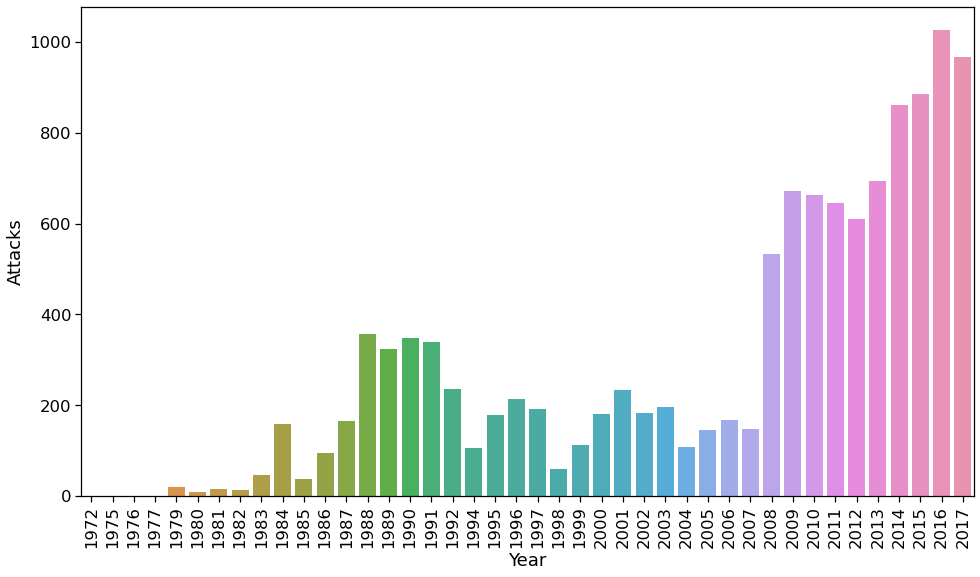

In [13]:
sns.set_context(context='notebook',font_scale=1.5)
plt.figure(figsize=(16,9))
v1=India['Year'].value_counts().to_frame().reset_index().rename(columns={'index':'Year','Year':'Attacks'}).sort_values(by='Year')
sns.barplot(data=v1,x='Year',y='Attacks',ci=None)
plt.xticks(rotation=90)

# Iraq

In [14]:
Iraq=df[df['Country']=='Iraq']

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36]),
 [Text(0, 0, '1975'),
  Text(1, 0, '1976'),
  Text(2, 0, '1979'),
  Text(3, 0, '1980'),
  Text(4, 0, '1981'),
  Text(5, 0, '1982'),
  Text(6, 0, '1983'),
  Text(7, 0, '1984'),
  Text(8, 0, '1987'),
  Text(9, 0, '1988'),
  Text(10, 0, '1989'),
  Text(11, 0, '1991'),
  Text(12, 0, '1992'),
  Text(13, 0, '1994'),
  Text(14, 0, '1995'),
  Text(15, 0, '1996'),
  Text(16, 0, '1997'),
  Text(17, 0, '1998'),
  Text(18, 0, '1999'),
  Text(19, 0, '2000'),
  Text(20, 0, '2001'),
  Text(21, 0, '2002'),
  Text(22, 0, '2003'),
  Text(23, 0, '2004'),
  Text(24, 0, '2005'),
  Text(25, 0, '2006'),
  Text(26, 0, '2007'),
  Text(27, 0, '2008'),
  Text(28, 0, '2009'),
  Text(29, 0, '2010'),
  Text(30, 0, '2011'),
  Text(31, 0, '2012'),
  Text(32, 0, '2013'),
  Text(33, 0, '2014'),
  Text(34, 0, '2015'),
  Text(35, 0, '2016'),
  Text(3

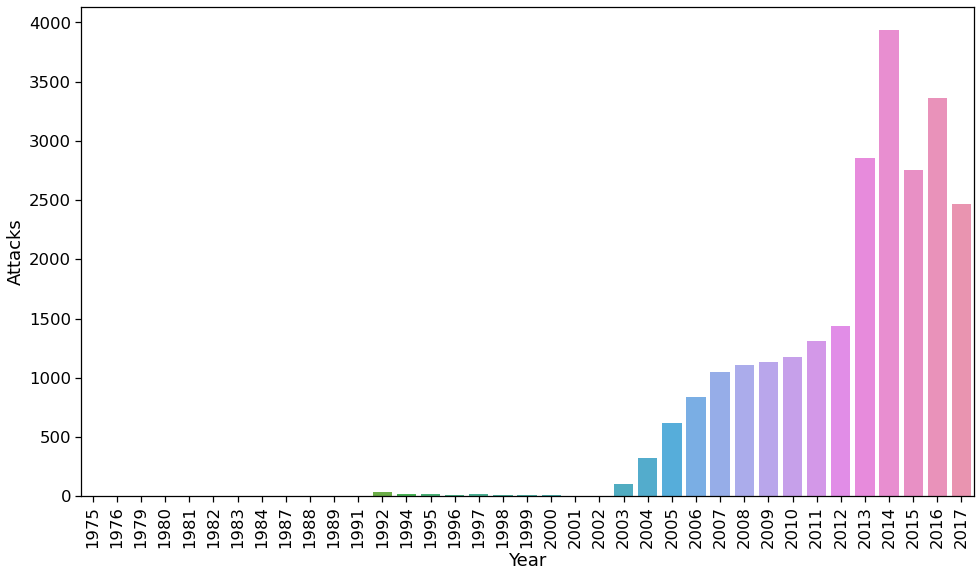

In [15]:
sns.set_context(context='notebook',font_scale=1.5)
plt.figure(figsize=(16,9))
v1=Iraq['Year'].value_counts().to_frame().reset_index().rename(columns={'index':'Year','Year':'Attacks'}).sort_values(by='Year')
sns.barplot(data=v1,x='Year',y='Attacks',ci=None)
plt.xticks(rotation=90)

## Afghanistan

In [16]:
Afghanistan=df[df['Country']=='Afghanistan']

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]),
 [Text(0, 0, '1973'),
  Text(1, 0, '1979'),
  Text(2, 0, '1987'),
  Text(3, 0, '1988'),
  Text(4, 0, '1989'),
  Text(5, 0, '1990'),
  Text(6, 0, '1991'),
  Text(7, 0, '1992'),
  Text(8, 0, '1994'),
  Text(9, 0, '1995'),
  Text(10, 0, '1996'),
  Text(11, 0, '1997'),
  Text(12, 0, '1998'),
  Text(13, 0, '1999'),
  Text(14, 0, '2000'),
  Text(15, 0, '2001'),
  Text(16, 0, '2002'),
  Text(17, 0, '2003'),
  Text(18, 0, '2004'),
  Text(19, 0, '2005'),
  Text(20, 0, '2006'),
  Text(21, 0, '2007'),
  Text(22, 0, '2008'),
  Text(23, 0, '2009'),
  Text(24, 0, '2010'),
  Text(25, 0, '2011'),
  Text(26, 0, '2012'),
  Text(27, 0, '2013'),
  Text(28, 0, '2014'),
  Text(29, 0, '2015'),
  Text(30, 0, '2016'),
  Text(31, 0, '2017')])

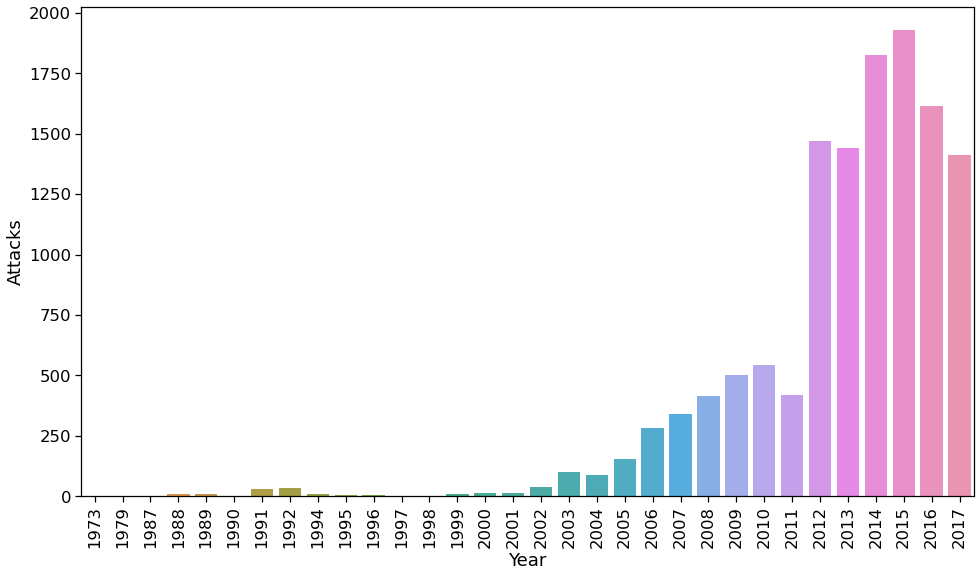

In [17]:
sns.set_context(context='notebook',font_scale=1.5)
plt.figure(figsize=(16,9))
v1=Afghanistan['Year'].value_counts().to_frame().reset_index().rename(columns={'index':'Year','Year':'Attacks'}).sort_values(by='Year')
sns.barplot(data=v1,x='Year',y='Attacks',ci=None)
plt.xticks(rotation=90)

# Thankyou